In [80]:
import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv('surabhi_res.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer
0,1.341791,1.528966,1.275932,-0.989683,-0.519782,-1.490924,0.995565,-1.240246,0.242068,1.160692,1.013423
1,0.458172,-0.645606,-1.163882,1.010425,0.885035,-1.490924,-1.004454,0.035922,-0.682816,-0.037270,-0.986754
2,-1.309064,1.094051,0.056025,1.010425,-1.222191,1.595060,-1.004454,1.312090,1.475247,-0.037270,1.013423
3,1.341791,0.224223,-1.163882,-0.989683,0.885035,-0.805150,0.995565,0.035922,-0.066226,1.160692,1.013423
4,-0.425446,-0.210692,0.056025,-0.989683,-0.870987,1.252173,0.995565,0.035922,0.242068,-1.235231,1.013423


In [82]:
df.groupby('Year')['Sports'].mean().head()

Year
-1.309064   -0.054608
-0.425446    0.069429
 0.458172    0.022649
 1.341791   -0.029572
Name: Sports, dtype: float64

In [83]:
 df.groupby('Year')['Sports'].mean().sort_values(ascending=False).head()

Year
-0.425446    0.069429
 0.458172    0.022649
 1.341791   -0.029572
-1.309064   -0.054608
Name: Sports, dtype: float64

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [85]:
goal_count = pd.DataFrame(df.groupby('Year')['Sports'].mean())
goal_count['goal_counts'] = pd.DataFrame(df.groupby('Year')['Sports'].count())
goal_count


,Sports,goal_counts
Year,,
-1.309064,-0.054608,180
-0.425446,0.069429,158
0.458172,0.022649,169
1.341791,-0.029572,168


<AxesSubplot:>

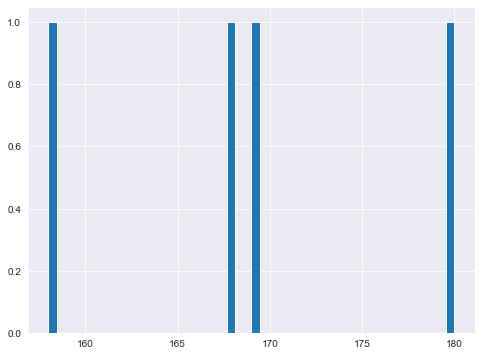

In [86]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
goal_count['goal_counts'].hist(bins=50)

<AxesSubplot:>

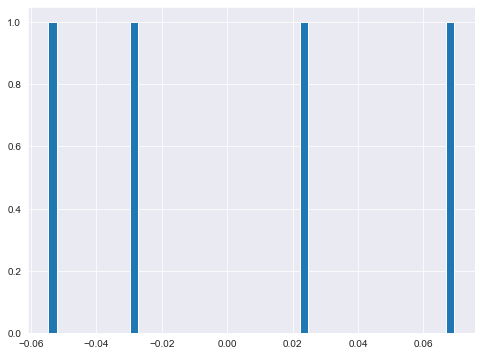

In [87]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
goal_count['Sports'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

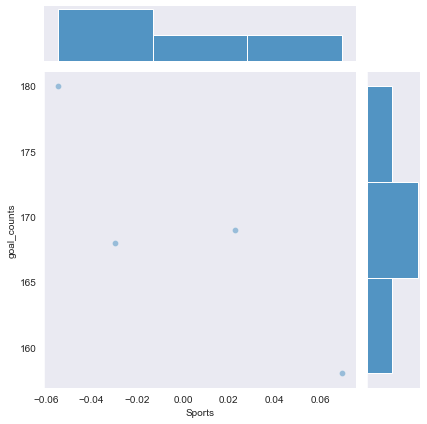

In [88]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Sports', y='goal_counts', data=goal_count, alpha=0.4)

In [89]:
test_goal = df.pivot_table(index=df.index, columns='Year', values='Sports')

test_goal

Year,-1.309064,-0.425446,0.458172,1.341791
0,NaN,NaN,NaN,-1.490924
1,NaN,NaN,-1.490924,NaN
2,1.595060,NaN,NaN,NaN
3,NaN,NaN,NaN,-0.805150
4,NaN,1.252173,NaN,NaN
...,...,...,...,...
670,1.252173,NaN,NaN,NaN
671,NaN,NaN,NaN,-0.805150
672,NaN,1.252173,NaN,NaN
673,NaN,NaN,0.566399,NaN


In [90]:
new_goal = test_goal[4]

new_goal.head()

KeyError: 4

In [44]:
goals_alike = test_goal.corrwith(new_goal)

goal_1 = pd.DataFrame(goals_alike, columns=['Correlation'])
goal_1.dropna(inplace=True)
goal_1.head()

,Correlation
Year,
4,1.0


In [60]:
goal_1


,Correlation,goal_counts
Year,,
4,1.0,168


In [62]:
goal_1[goal_1 ['goal_counts']>5].sort_values('Correlation', ascending=False).head()


,Correlation,goal_counts
Year,,
4,1.0,168
